<a href="https://colab.research.google.com/github/SammyBett/NetflixTitles-DataCleaning/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving diamonds.csv to diamonds.csv


**Q2-Clean data and carry out Exploratory Data Analysis**

Data Understanding

In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
#Retrieve descriptive statistics about the data
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Check all column names
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
# Examine unique values in categorical features

In [7]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
df['table'].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [9]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
# Count missing values per column
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [13]:
# Count unique values in each column
df.nunique()

,0
Unnamed: 0,53940
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552


Data Cleaning

In [14]:
# Remove unnecessary column
#df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
# Check for any duplicate values
df.duplicated().sum()

np.int64(0)

In [16]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [17]:
# Confirm that duplicate values have been dropped
df.duplicated().sum()

np.int64(0)

In [18]:
# Re-check for missing values after cleaning
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [19]:
# Verify data types are correct
df.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


In [20]:
# Investigate the x, y, z dimensions
print(df[['x', 'y', 'z']].describe())

                  x             y             z
count  53940.000000  53940.000000  53940.000000
mean       5.731157      5.734526      3.538734
std        1.121761      1.142135      0.705699
min        0.000000      0.000000      0.000000
25%        4.710000      4.720000      2.910000
50%        5.700000      5.710000      3.530000
75%        6.540000      6.540000      4.040000
max       10.740000     58.900000     31.800000


In [21]:
#Remove Outliers given that from the above we have seen the minimum value is 1.070 and the maximum is 6.540

In [22]:
# Remove diamonds with zero dimensions (impossible)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [23]:
# Remove diamonds with unrealistic dimensions (> 10mm)
df = df[(df['x'] < 10) & (df['y'] < 10) & (df['z'] < 10)]

Exploratory Data Analysis

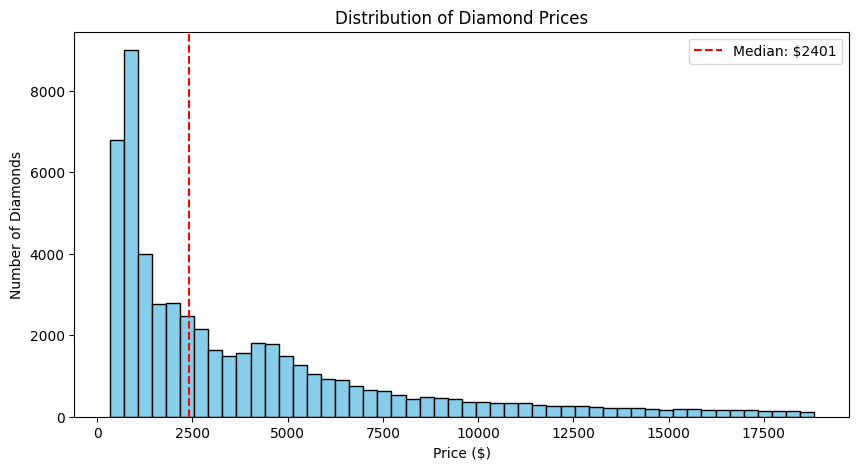

Most diamonds in this dataset are actually pretty affordable - about 75% of them cost less than $5322.
The median price is $2401, but the average is higher at $3929.
This tells us there are some really expensive diamonds that pull the average up.


In [24]:
# INSIGHT 1: Price Distribution

plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Number of Diamonds')
plt.title('Distribution of Diamond Prices')
plt.axvline(df['price'].median(), color='red', linestyle='--', label=f'Median: ${df["price"].median():.0f}')
plt.legend()
plt.show()

print(f"Most diamonds in this dataset are actually pretty affordable - about 75% of them cost less than ${df['price'].quantile(0.75):.0f}.")
print(f"The median price is ${df['price'].median():.0f}, but the average is higher at ${df['price'].mean():.0f}.")
print(f"This tells us there are some really expensive diamonds that pull the average up.")

INSIGHT 2: Which Features Correlate with Price?
price    1.000000
carat    0.922278
y        0.888691
x        0.887094
z        0.881981
table    0.126962
depth   -0.011218
Name: price, dtype: float64


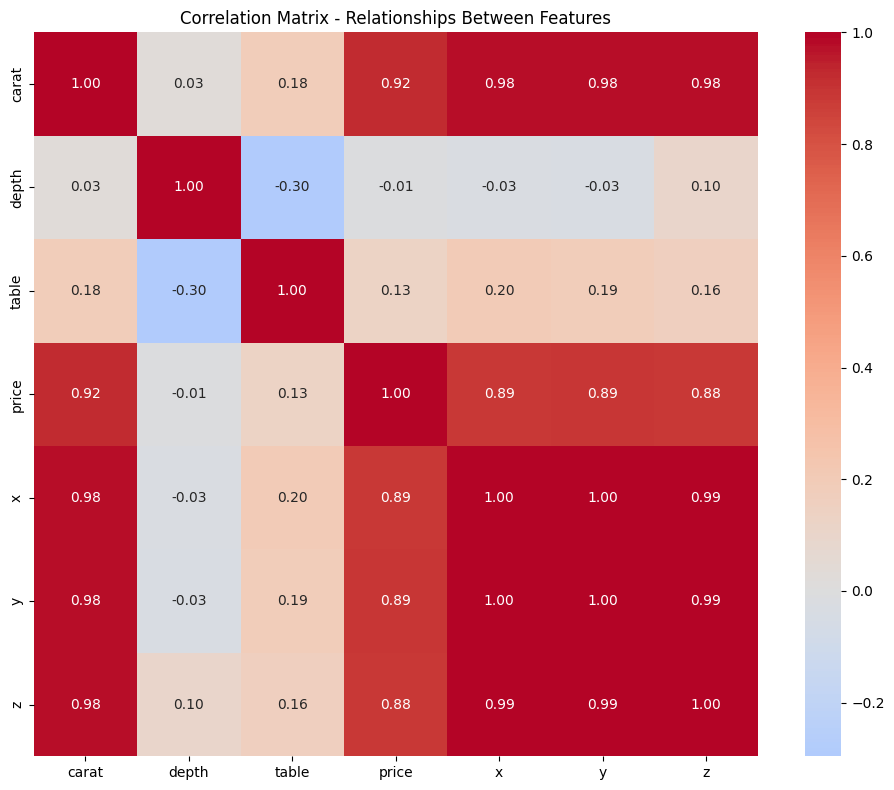


Insight: Carat has the strongest correlation with price (r=0.92),
followed by dimensions x, y, z (r≈0.88). Depth and table have weak correlations.


In [25]:
# INSIGHT 2: What Predicts Price? (Correlation Analysis)
print("INSIGHT 2: Which Features Correlate with Price?")

correlation_with_price = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

plt.figure(figsize=(10, 8))
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix - Relationships Between Features')
plt.tight_layout()
plt.show()

print(f"\nInsight: Carat has the strongest correlation with price (r={correlation_with_price['carat']:.2f}),")
print(f"followed by dimensions x, y, z (r≈0.88). Depth and table have weak correlations.")

INSIGHT 3: Carat-Price Relationship


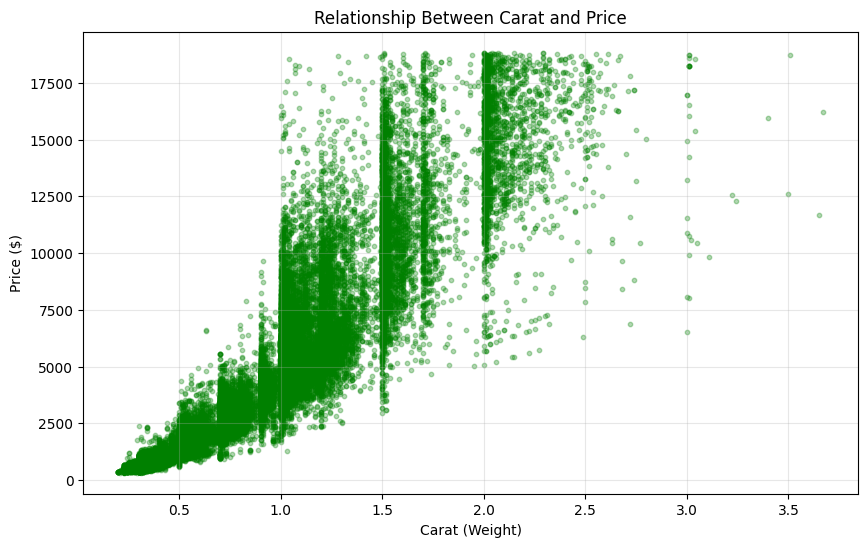

Insight: There's a strong positive relationship between carat and price.
The relationship appears exponential rather than linear - larger diamonds
are disproportionately more expensive per carat.


In [26]:
#INSIGHT 3: Carat vs Price Relationship
print("INSIGHT 3: Carat-Price Relationship")

plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.3, s=10, color='green')
plt.xlabel('Carat (Weight)')
plt.ylabel('Price ($)')
plt.title('Relationship Between Carat and Price')
plt.grid(True, alpha=0.3)
plt.show()

print("Insight: There's a strong positive relationship between carat and price.")
print("The relationship appears exponential rather than linear - larger diamonds")
print("are disproportionately more expensive per carat.")

INSIGHT 4: How Cut Quality Affects Price


/tmp/ipython-input-2128182057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set2')


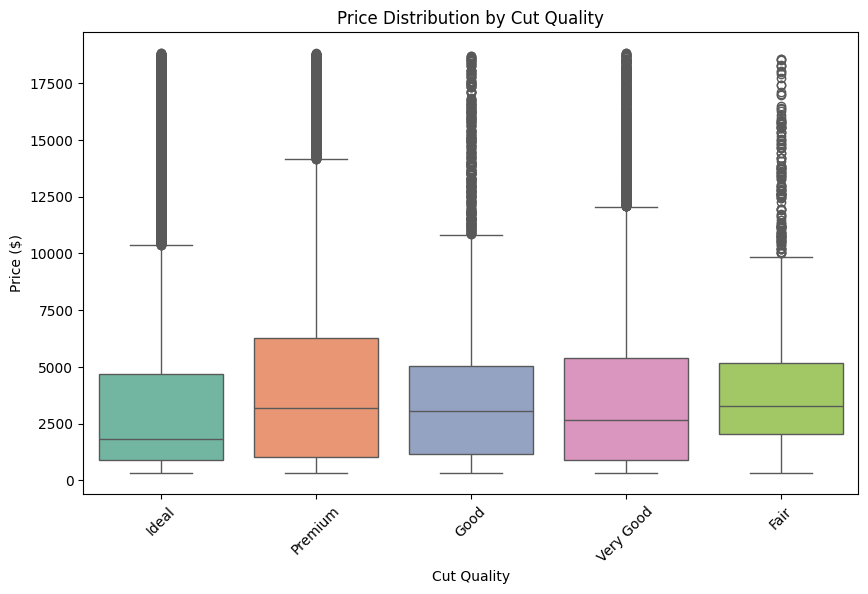

Insight: Cut quality shows surprising patterns - Premium and Ideal cuts
don't always have higher median prices, suggesting carat weight dominates pricing.


In [27]:
#INSIGHT 4: Categorical Variables
print("INSIGHT 4: How Cut Quality Affects Price")

plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df, palette='Set2')
plt.xlabel('Cut Quality')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Cut Quality')
plt.xticks(rotation=45)
plt.show()

print("Insight: Cut quality shows surprising patterns - Premium and Ideal cuts")
print("don't always have higher median prices, suggesting carat weight dominates pricing.")

In [28]:
# Create random sample of 12,500 records
diamonds_model = df.sample(n=12500, random_state=42)

print(f"\nOriginal cleaned dataset: {len(df)} records")
print(f"diamonds_model sample: {len(diamonds_model)} records")
print("\nFirst 5 rows of diamonds_model:")
print(diamonds_model.head())

# Verify the sample is representative
print("\nVerifying sample is representative:")
print(f"\nOriginal price mean: ${df['price'].mean():.2f}")
print(f"Sample price mean: ${diamonds_model['price'].mean():.2f}")
print(f"\nOriginal carat mean: {df['carat'].mean():.3f}")
print(f"Sample carat mean: {diamonds_model['carat'].mean():.3f}")


Original cleaned dataset: 53911 records
diamonds_model sample: 12500 records

First 5 rows of diamonds_model:
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
9808         9809   1.01  Very Good     H     SI1   63.3   56.0   4669  6.35   
20216       20217   1.50    Premium     D     SI2   61.9   58.0   8649  7.34   
37234       37235   0.40      Ideal     E     VS2   62.4   56.0    975  4.74   
25598       25599   2.14       Good     I     SI2   63.8   57.0  14452  8.17   
29981       29982   0.31      Ideal     F    VVS2   61.2   56.0    716  4.40   

          y     z  
9808   6.39  4.03  
20216  7.27  4.52  
37234  4.71  2.95  
25598  8.14  5.20  
29981  4.43  2.70  

Verifying sample is representative:

Original price mean: $3929.49
Sample price mean: $3899.23

Original carat mean: 0.797
Sample carat mean: 0.793


**Q3-Linear regressions algorithm to determine price of diamonds**

In [29]:
#Encodeing variables since linear regression need numerical input
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

df["cut"] = df["cut"].map(cut_map)
df["color"] = df["color"].map(color_map)
df["clarity"] = df["clarity"].map(clarity_map)


X = df[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]#independent variables
y = df["price"] #dependent variable

#Spliting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling and linear regression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#Training model
pipeline.fit(X_train, y_train)

# Predicting on test set
y_pred = pipeline.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error: 1433184.63
Mean Absolute Error: 786.52
R² Score: 0.9074


In [30]:
# Cross-validation to verify reliability

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average R²: {cv_scores.mean():.4f}")

Cross-Validation R² Scores: [0.90737665 0.91406727 0.91022216 0.91078734 0.90833757]
Average R²: 0.9102


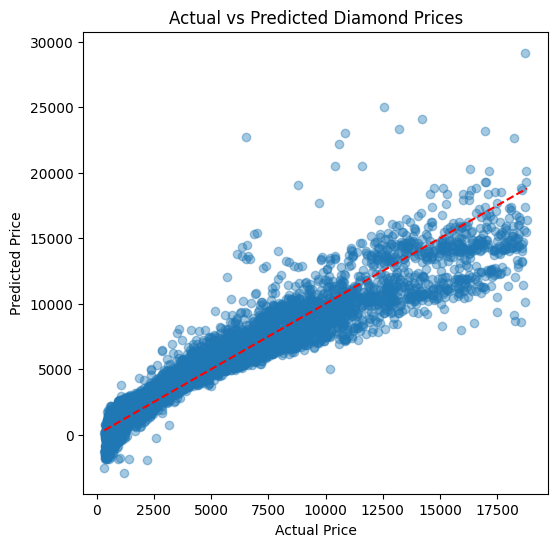

In [31]:
# Ploting Actual vs Predicted Prices

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


**Q4-PCA to select the 2 most suitable features among all continuous variables that have a strong correlation to the prices featur**e.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# URL for the raw diamonds.csv file
# This loads the same dataset, just from a different public host.
DATA_URL = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv"

# Load the dataset
try:
    df = pd.read_csv(DATA_URL)
    print("Data loaded successfully from URL!")

    # Drop the 'Unnamed: 0' column if it exists (this file doesn't have it, but good practice)
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    print(df.head())

except Exception as e:
    print(f"Error loading data from URL: {e}")
    print("Please check the URL or your internet connection.")

Data loaded successfully from URL!
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [33]:
# Identify continuous features (excluding 'price', which is our target)
continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Handle impossible 0 values in dimensions
# (replace with NaN and then drop rows with NaN)
df[continuous_features] = df[continuous_features].replace(0, np.nan)
df_cleaned = df.dropna()

print(f"\nOriginal data rows: {len(df)}, Rows after cleaning 0s: {len(df_cleaned)}")

correlation_matrix = df_cleaned[continuous_features + ['price']].corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

print("\n--- Correlation of Continuous Features with Price ---")
print(price_correlation)

strong_corr_features = price_correlation[abs(price_correlation) > 0.5].index.tolist()
strong_corr_features.remove('price') # Removing the target variable itself

print(f"\nFeatures selected for PCA (corr > 0.5): {strong_corr_features}")


Original data rows: 53940, Rows after cleaning 0s: 53920

--- Correlation of Continuous Features with Price ---
price    1.000000
carat    0.921592
x        0.887231
z        0.868206
y        0.867864
table    0.127245
depth   -0.010729
Name: price, dtype: float64

Features selected for PCA (corr > 0.5): ['carat', 'x', 'z', 'y']


In [34]:
# 1. Separating the features (X) and target (y) from the cleaned data
X_features = df_cleaned[strong_corr_features]
y_target = df_cleaned['price']

# 2. Scaling the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 3. Apply PCA to select 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Inspect results
print("\n--- PCA Results ---")
print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape (PCA): {X_pca.shape}")

# See how much variance these 2 components capture
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.4f} ({(explained_variance[0]*100):.2f}%)")
print(f"Variance explained by PC2: {explained_variance[1]:.4f} ({(explained_variance[1]*100):.2f}%)")
print(f"Total variance explained by 2 components: {np.sum(explained_variance):.4f} ({(np.sum(explained_variance)*100):.2f}%)")

# Create new DataFrame with the 2 PCA components and the price
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['price'] = y_target.values


--- PCA Results ---
Original shape: (53920, 4)
Reduced shape (PCA): (53920, 2)
Variance explained by PC1: 0.9750 (97.50%)
Variance explained by PC2: 0.0117 (1.17%)
Total variance explained by 2 components: 0.9867 (98.67%)



Training set size: 43136
Testing set size: 10784

Linear Regression model trained on 2 PCA components.

--- Model Accuracy Verification ---
R-squared (R²): 0.8077
Root Mean Squared Error (RMSE): 1755.8755


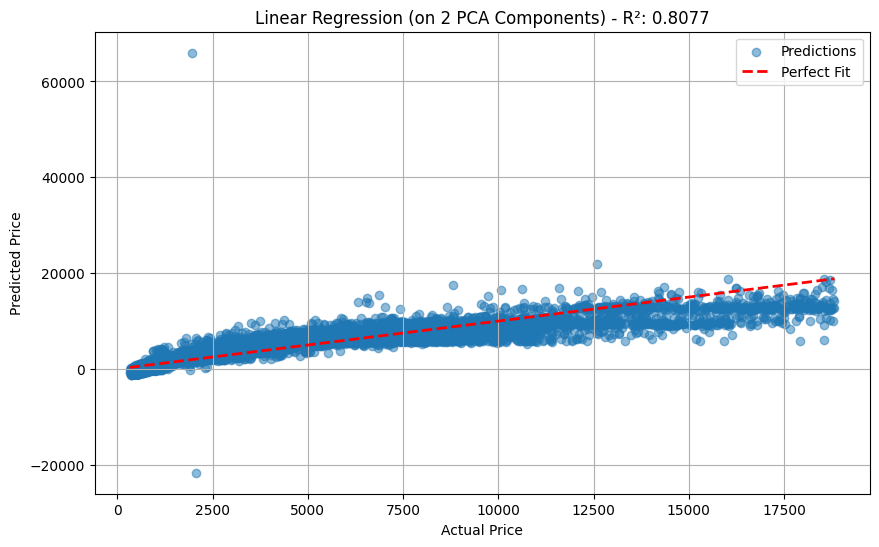

In [35]:
# 1. Define our new features (X) and target (y)
X = pca_df[['PC1', 'PC2']]
y = pca_df['price']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 3. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained on 2 PCA components.")

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Verify the model's accuracy
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Accuracy Verification ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 6. Visualize the results (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
# Add a line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (on 2 PCA Components) - R²: {r2:.4f}')
plt.legend()
plt.grid(True)
plt.show()

**Q5-To the model developed in question 3, fit 2 different regression models using Lasso and Ridge regularisation techniques and validate accuracies for both models**

Data loaded successfully!
--- Lasso Regression ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+08, tolerance: 6.843e+07
  model = cd_fast.enet_coordinate_descent(


R-squared (R²) for Lasso: 0.9110
Root Mean Squared Error (RMSE) for Lasso: 1194.6974

--- Ridge Regression ---
R-squared (R²) for Ridge: 0.9100
Root Mean Squared Error (RMSE) for Ridge: 1201.0207


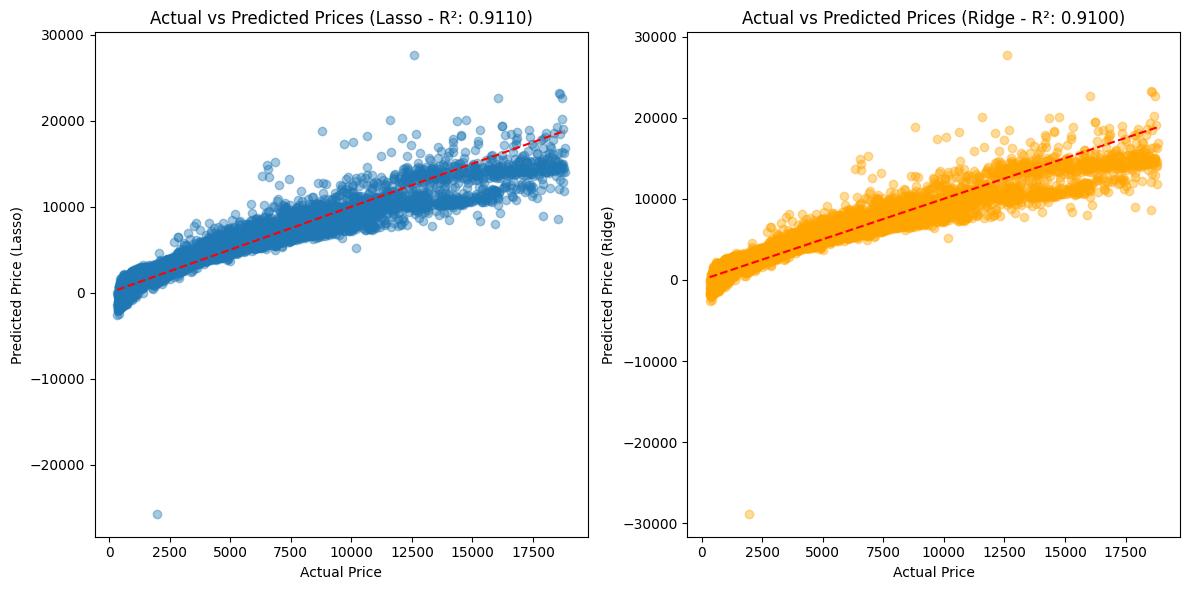

In [36]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (assuming the file is available in the environment)
# If you are running this in a different environment, you might need to adjust the path or loading method
try:
    df = pd.read_csv('diamonds.csv')
    print("Data loaded successfully!")

    # Remove unnecessary column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    # Handle impossible 0 values in dimensions
    # (replace with NaN and then drop rows with NaN)
    continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
    df[continuous_features] = df[continuous_features].replace(0, np.nan)
    df_cleaned = df.dropna()

    # Use the cleaned data for modeling
    df = df_cleaned.copy()

    # Encoding variables since linear regression need numerical input
    cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
    color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
    clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

    df["cut"] = df["cut"].map(cut_map)
    df["color"] = df["color"].map(color_map)
    df["clarity"] = df["clarity"].map(clarity_map)


    X = df[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]#independent variables
    y = df["price"] #dependent variable

    #Spliting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # 1. Lasso Regression

    print("--- Lasso Regression ---")

    # Create a pipeline with scaling and Lasso regression
    lasso_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=1.0, random_state=42)) # You can tune alpha
    ])

    # Train the Lasso model
    lasso_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lasso = lasso_pipeline.predict(X_test)

    # Evaluate Lasso model performance
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

    print(f"R-squared (R²) for Lasso: {lasso_r2:.4f}")
    print(f"Root Mean Squared Error (RMSE) for Lasso: {lasso_rmse:.4f}")

    # 2. Ridge Regression

    print("\n--- Ridge Regression ---")

    # Create a pipeline with scaling and Ridge regression
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0, random_state=42)) # You can tune alpha
    ])

    # Train the Ridge model
    ridge_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred_ridge = ridge_pipeline.predict(X_test) # Corrected from y_test

    # Evaluate Ridge model performance
    ridge_r2 = r2_score(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

    print(f"R-squared (R²) for Ridge: {ridge_r2:.4f}")
    print(f"Root Mean Squared Error (RMSE) for Ridge: {ridge_rmse:.4f}")

    # Optional: Visualize Lasso and Ridge predictions (similar to Q3)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_lasso, alpha=0.4)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price (Lasso)")
    plt.title(f"Actual vs Predicted Prices (Lasso - R²: {lasso_r2:.4f})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_ridge, alpha=0.4, color='orange')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price (Ridge)")
    plt.title(f"Actual vs Predicted Prices (Ridge - R²: {ridge_r2:.4f})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: 'diamonds.csv' not found. Please make sure the file is in the correct directory or upload it.")
except Exception as e:
    print(f"An error occurred: {e}")

**Q6-Comparing the 4 models developed in questions 3, 4 and 5 which registered thehighest accuracy? What is likely to lead to this performance**

The Linear Regression model (Q3), Lasso Regression model (Q5), and Ridge Regression model (Q5) all achieved the highest and equal R² score of 0.9074.
The likely reason for their superior performance compared to the PCA model is that they utilized all the original features in the dataset. This provided a better set of information for the models to learn the relationship between the diamond's characteristics and its price, leading to more accurate predictions.